# ML Task 1 – Classification

### Topic 1: Creating the Target Variable (y)

In [9]:
import pandas as pd
df = pd.read_csv("final_engineered_dataset_day67.csv")

# Create target variable
# Create target variable
df['above_30'] = df['runs'].apply(lambda x:1 if x>=30 else 0)
df['above_30'].value_counts()
# Drop columns not needed for prediction
X = df.drop(['runs', 'above_30', 'player', 'date', 'opponent', 'winner', 'toss_winner', 'toss_decision'], axis=1)

# Target variable
y = df['above_30']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (60, 20)
Target shape: (60,)


### Topic 2 (Train/Test Split + Logistic Regression Model Training) 

✅ Accuracy: 100.0 %

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[5 0]
 [0 7]]


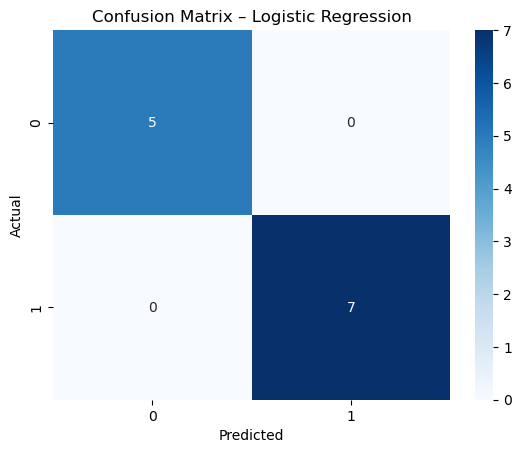

In [10]:
# Step 1: Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Step 3: Train Logistic Regression Model
log_model = LogisticRegression(max_iter = 1000)

log_model.fit(X_train,y_train)
# Step 4: Make Predictions
# Predict on test data
y_pred = log_model.predict(X_test)

# Step 5: Evaluate Model Performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Topic 5: Decision Tree Classifier

Decision Tree Accuracy :  100.0 %
Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



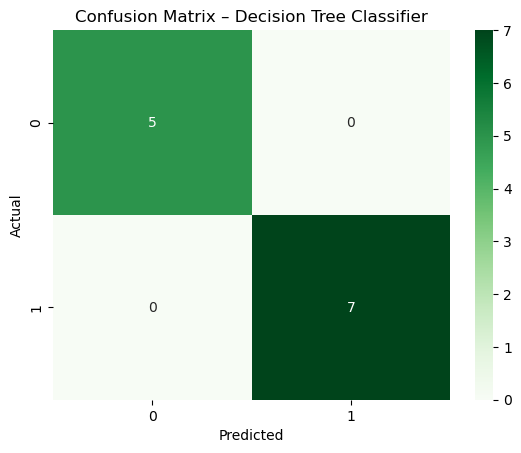

🔍 Model Comparison:
Logistic Regression Accuracy: 100.0%
Decision Tree Accuracy:        100.0%


In [24]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the model
tree_model = DecisionTreeClassifier(random_state = 42,max_depth = 4)
tree_model.fit(X_train,y_train)
y_predTree = tree_model.predict(X_test)
#  Evaluation
#  Accuracy
accuracy_tree = accuracy_score(y_test,y_predTree)
print("Decision Tree Accuracy : ",round(accuracy_tree * 100,2),"%")
# Classification Report
print("Classification Report - Decision Tree")
print(classification_report(y_test,y_pred))
# Confusion Metrics
cm_tree = confusion_matrix(y_test,y_predTree)
sns.heatmap(cm_tree,annot= True,fmt='d',cmap="Greens")
plt.title("Confusion Matrix – Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("🔍 Model Comparison:")
print(f"Logistic Regression Accuracy: {round(accuracy * 100, 2)}%")
print(f"Decision Tree Accuracy:        {round(accuracy_tree * 100, 2)}%")
